In [ ]:
import torch
import torch.nn.functional as F
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED = 123
DEVICE = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
df = pd.read_csv('xor.csv')
X = df[['x1', 'x2']].values
y = df['class label'].values

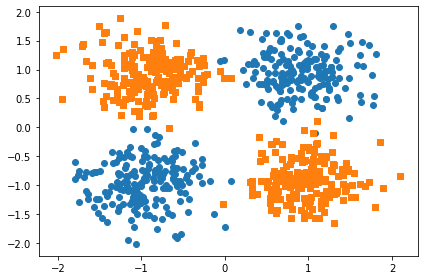

In [ ]:
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], marker='s')

plt.tight_layout()
#plt.savefig('xor.pdf')
plt.show()

In [ ]:
y.shape

(750,)

In [ ]:
X_train, X_test = X[:100], X[100:]
Y_train, Y_test = y[:100], y[100:]

In [ ]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(100, 2) (650, 2)
(100,) (650,)


In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits, probas = classifier.forward(tensor)
    Z = np.argmax(probas.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

In [ ]:
class MLPReLU(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1, num_classes):
        super(MLPReLU, self).__init__()

        self.num_classes = num_classes

        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)

    def forward(self, x):

        out = self.linear_1(x)
        out = F.relu(out)

        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas

    def predict_labels(self, x):
        logits, probas = self.forward(torch.tensor(x, dtype=torch.float).to(DEVICE))
        Z = np.argmax(probas.detach().numpy(), axis=1)
        return Z

    def train(self, x, y):
      start_time = time.time()
      minibatch_cost = []

      NUM_EPOCHS = 25

      features = torch.tensor(x, dtype=torch.float).to(DEVICE)
      targets = torch.tensor(y, dtype=torch.long).to(DEVICE)


      for epoch in range(NUM_EPOCHS):

          ### FORWARD AND BACK PROP
          logits, probas = self.forward(features)

          cost = F.cross_entropy(logits, targets)
          optimizer.zero_grad()

          cost.backward()
          minibatch_cost.append(cost)
          ### UPDATE MODEL PARAMETERS
          optimizer.step()


          ### LOGGING

          print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | Cost: {cost:.4f}')

      print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

    def evaluate(self, x, y):
        labels = self.predict_labels(x)
        # print(labels, y, torch.tensor(labels), torch.tensor(y))
        # print(torch.tensor(labels) == torch.tensor(y))
        # print(torch.sum(torch.tensor(labels) == torch.tensor(y)))
        # print(torch.sum(torch.tensor(labels) == torch.tensor(y)).item())
        # print(len(y))
        accuracy = torch.sum(torch.tensor(labels, dtype=torch.float).float() == torch.tensor(y, dtype=torch.float).float()).item() / len(y)
        return accuracy


In [ ]:
train_accuracies = []
test_accuracies = []

## 10 Hidden Neurons

In [ ]:
torch.manual_seed(RANDOM_SEED)

model_10 = MLPReLU(num_features=2,
                num_hidden_1=10,
                num_classes=2)

model_10 = model_10.to(DEVICE)

optimizer = torch.optim.SGD(model_10.parameters(), lr=0.1)

In [ ]:
model_10.train(X_train, Y_train)

Epoch: 001/025 | Cost: 0.7479
Epoch: 002/025 | Cost: 0.7407
Epoch: 003/025 | Cost: 0.7344
Epoch: 004/025 | Cost: 0.7288
Epoch: 005/025 | Cost: 0.7237
Epoch: 006/025 | Cost: 0.7190
Epoch: 007/025 | Cost: 0.7146
Epoch: 008/025 | Cost: 0.7105
Epoch: 009/025 | Cost: 0.7067
Epoch: 010/025 | Cost: 0.7031
Epoch: 011/025 | Cost: 0.6996
Epoch: 012/025 | Cost: 0.6963
Epoch: 013/025 | Cost: 0.6931
Epoch: 014/025 | Cost: 0.6900
Epoch: 015/025 | Cost: 0.6870
Epoch: 016/025 | Cost: 0.6841
Epoch: 017/025 | Cost: 0.6812
Epoch: 018/025 | Cost: 0.6783
Epoch: 019/025 | Cost: 0.6755
Epoch: 020/025 | Cost: 0.6727
Epoch: 021/025 | Cost: 0.6700
Epoch: 022/025 | Cost: 0.6674
Epoch: 023/025 | Cost: 0.6647
Epoch: 024/025 | Cost: 0.6620
Epoch: 025/025 | Cost: 0.6594
Total Training Time: 0.00 min


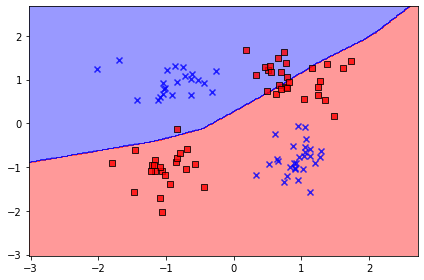

In [ ]:
features = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
targets = torch.tensor(Y_train, dtype=torch.long).to(DEVICE)

plot_decision_regions(features, targets, classifier=model_10)

plt.tight_layout()
#plt.savefig('xor2.pdf')
plt.show()

In [ ]:
train_accuracies.append(model_10.evaluate(X_train, Y_train))
print(model_10.evaluate(X_train, Y_train))

test_accuracies.append(model_10.evaluate(X_test, Y_test))
print(model_10.evaluate(X_test, Y_test))

0.58
0.6569230769230769


## 25

Epoch: 001/025 | Cost: 0.7460
Epoch: 002/025 | Cost: 0.7177
Epoch: 003/025 | Cost: 0.6955
Epoch: 004/025 | Cost: 0.6773
Epoch: 005/025 | Cost: 0.6618
Epoch: 006/025 | Cost: 0.6482
Epoch: 007/025 | Cost: 0.6358
Epoch: 008/025 | Cost: 0.6243
Epoch: 009/025 | Cost: 0.6135
Epoch: 010/025 | Cost: 0.6031
Epoch: 011/025 | Cost: 0.5931
Epoch: 012/025 | Cost: 0.5834
Epoch: 013/025 | Cost: 0.5739
Epoch: 014/025 | Cost: 0.5647
Epoch: 015/025 | Cost: 0.5556
Epoch: 016/025 | Cost: 0.5467
Epoch: 017/025 | Cost: 0.5378
Epoch: 018/025 | Cost: 0.5291
Epoch: 019/025 | Cost: 0.5205
Epoch: 020/025 | Cost: 0.5120
Epoch: 021/025 | Cost: 0.5035
Epoch: 022/025 | Cost: 0.4951
Epoch: 023/025 | Cost: 0.4868
Epoch: 024/025 | Cost: 0.4786
Epoch: 025/025 | Cost: 0.4704
Total Training Time: 0.00 min


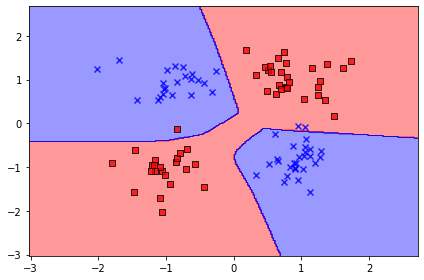

0.97
0.9784615384615385


In [ ]:
torch.manual_seed(RANDOM_SEED)

model_25 = MLPReLU(num_features=2,
                num_hidden_1=25,
                num_classes=2)

model_25 = model_25.to(DEVICE)

optimizer = torch.optim.SGD(model_25.parameters(), lr=0.1)

model_25.train(X_train, Y_train)

features = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
targets = torch.tensor(Y_train, dtype=torch.long).to(DEVICE)

plot_decision_regions(features, targets, classifier=model_25)

plt.tight_layout()
#plt.savefig('xor2.pdf')
plt.show()

train_accuracies.append(model_25.evaluate(X_train, Y_train))
print(model_25.evaluate(X_train, Y_train))

test_accuracies.append(model_25.evaluate(X_test, Y_test))
print(model_25.evaluate(X_test, Y_test))

## 50

Epoch: 001/025 | Cost: 0.7189
Epoch: 002/025 | Cost: 0.6914
Epoch: 003/025 | Cost: 0.6671
Epoch: 004/025 | Cost: 0.6446
Epoch: 005/025 | Cost: 0.6236
Epoch: 006/025 | Cost: 0.6037
Epoch: 007/025 | Cost: 0.5848
Epoch: 008/025 | Cost: 0.5668
Epoch: 009/025 | Cost: 0.5496
Epoch: 010/025 | Cost: 0.5332
Epoch: 011/025 | Cost: 0.5174
Epoch: 012/025 | Cost: 0.5022
Epoch: 013/025 | Cost: 0.4877
Epoch: 014/025 | Cost: 0.4737
Epoch: 015/025 | Cost: 0.4602
Epoch: 016/025 | Cost: 0.4472
Epoch: 017/025 | Cost: 0.4347
Epoch: 018/025 | Cost: 0.4226
Epoch: 019/025 | Cost: 0.4109
Epoch: 020/025 | Cost: 0.3997
Epoch: 021/025 | Cost: 0.3889
Epoch: 022/025 | Cost: 0.3784
Epoch: 023/025 | Cost: 0.3682
Epoch: 024/025 | Cost: 0.3585
Epoch: 025/025 | Cost: 0.3491
Total Training Time: 0.00 min


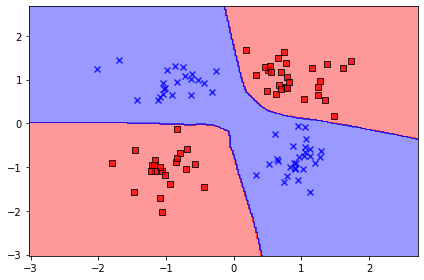

1.0
0.9876923076923076


In [ ]:
torch.manual_seed(RANDOM_SEED)

model_50 = MLPReLU(num_features=2,
                num_hidden_1=50,
                num_classes=2)

model_50 = model_50.to(DEVICE)

optimizer = torch.optim.SGD(model_50.parameters(), lr=0.1)

model_50.train(X_train, Y_train)

features = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
targets = torch.tensor(Y_train, dtype=torch.long).to(DEVICE)

plot_decision_regions(features, targets, classifier=model_50)

plt.tight_layout()
#plt.savefig('xor2.pdf')
plt.show()

train_accuracies.append(model_50.evaluate(X_train, Y_train))
print(model_50.evaluate(X_train, Y_train))

test_accuracies.append(model_50.evaluate(X_test, Y_test))
print(model_50.evaluate(X_test, Y_test))

## 100

Epoch: 001/025 | Cost: 0.7917
Epoch: 002/025 | Cost: 0.7071
Epoch: 003/025 | Cost: 0.6561
Epoch: 004/025 | Cost: 0.6135
Epoch: 005/025 | Cost: 0.5758
Epoch: 006/025 | Cost: 0.5419
Epoch: 007/025 | Cost: 0.5114
Epoch: 008/025 | Cost: 0.4837
Epoch: 009/025 | Cost: 0.4586
Epoch: 010/025 | Cost: 0.4357
Epoch: 011/025 | Cost: 0.4147
Epoch: 012/025 | Cost: 0.3955
Epoch: 013/025 | Cost: 0.3778
Epoch: 014/025 | Cost: 0.3615
Epoch: 015/025 | Cost: 0.3465
Epoch: 016/025 | Cost: 0.3325
Epoch: 017/025 | Cost: 0.3196
Epoch: 018/025 | Cost: 0.3075
Epoch: 019/025 | Cost: 0.2962
Epoch: 020/025 | Cost: 0.2857
Epoch: 021/025 | Cost: 0.2759
Epoch: 022/025 | Cost: 0.2667
Epoch: 023/025 | Cost: 0.2581
Epoch: 024/025 | Cost: 0.2499
Epoch: 025/025 | Cost: 0.2423
Total Training Time: 0.00 min


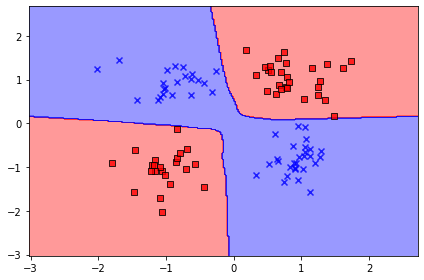

1.0
0.9861538461538462


In [ ]:
torch.manual_seed(RANDOM_SEED)

model_100 = MLPReLU(num_features=2,
                num_hidden_1=100,
                num_classes=2)

model_100 = model_100.to(DEVICE)

optimizer = torch.optim.SGD(model_100.parameters(), lr=0.1)

model_100.train(X_train, Y_train)

features = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
targets = torch.tensor(Y_train, dtype=torch.long).to(DEVICE)

plot_decision_regions(features, targets, classifier=model_100)

plt.tight_layout()
#plt.savefig('xor2.pdf')
plt.show()

train_accuracies.append(model_100.evaluate(X_train, Y_train))
print(model_100.evaluate(X_train, Y_train))

test_accuracies.append(model_100.evaluate(X_test, Y_test))
print(model_100.evaluate(X_test, Y_test))

## 1000

Epoch: 001/025 | Cost: 0.7268
Epoch: 002/025 | Cost: 0.6563
Epoch: 003/025 | Cost: 2.4291
Epoch: 004/025 | Cost: 2.8922
Epoch: 005/025 | Cost: 1.1829
Epoch: 006/025 | Cost: 1.4733
Epoch: 007/025 | Cost: 0.5606
Epoch: 008/025 | Cost: 0.1735
Epoch: 009/025 | Cost: 0.0330
Epoch: 010/025 | Cost: 0.0322
Epoch: 011/025 | Cost: 0.0316
Epoch: 012/025 | Cost: 0.0311
Epoch: 013/025 | Cost: 0.0306
Epoch: 014/025 | Cost: 0.0302
Epoch: 015/025 | Cost: 0.0299
Epoch: 016/025 | Cost: 0.0296
Epoch: 017/025 | Cost: 0.0293
Epoch: 018/025 | Cost: 0.0290
Epoch: 019/025 | Cost: 0.0287
Epoch: 020/025 | Cost: 0.0285
Epoch: 021/025 | Cost: 0.0282
Epoch: 022/025 | Cost: 0.0280
Epoch: 023/025 | Cost: 0.0277
Epoch: 024/025 | Cost: 0.0275
Epoch: 025/025 | Cost: 0.0272
Total Training Time: 0.00 min


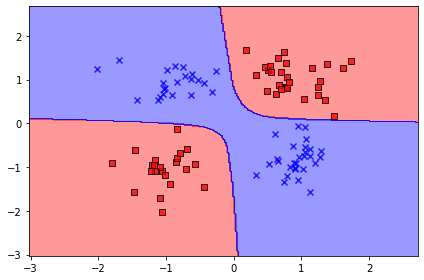

1.0
0.9876923076923076


In [ ]:
torch.manual_seed(RANDOM_SEED)

model_1000 = MLPReLU(num_features=2,
                num_hidden_1=1000,
                num_classes=2)

model_1000 = model_1000.to(DEVICE)

optimizer = torch.optim.SGD(model_1000.parameters(), lr=0.1)

model_1000.train(X_train, Y_train)

features = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
targets = torch.tensor(Y_train, dtype=torch.long).to(DEVICE)

plot_decision_regions(features, targets, classifier=model_1000)

plt.tight_layout()
#plt.savefig('xor2.pdf')
plt.show()

train_accuracies.append(model_1000.evaluate(X_train, Y_train))
print(model_1000.evaluate(X_train, Y_train))

test_accuracies.append(model_1000.evaluate(X_test, Y_test))
print(model_1000.evaluate(X_test, Y_test))

## 10000

Epoch: 001/025 | Cost: 0.6497
Epoch: 002/025 | Cost: 1.9020
Epoch: 003/025 | Cost: 25.4290
Epoch: 004/025 | Cost: 22.7623
Epoch: 005/025 | Cost: 9.3016
Epoch: 006/025 | Cost: 9.3771
Epoch: 007/025 | Cost: 12.0573
Epoch: 008/025 | Cost: 7.1136
Epoch: 009/025 | Cost: 1.1762
Epoch: 010/025 | Cost: 0.0000
Epoch: 011/025 | Cost: 0.0000
Epoch: 012/025 | Cost: 0.0000
Epoch: 013/025 | Cost: 0.0000
Epoch: 014/025 | Cost: 0.0000
Epoch: 015/025 | Cost: 0.0000
Epoch: 016/025 | Cost: 0.0000
Epoch: 017/025 | Cost: 0.0000
Epoch: 018/025 | Cost: 0.0000
Epoch: 019/025 | Cost: 0.0000
Epoch: 020/025 | Cost: 0.0000
Epoch: 021/025 | Cost: 0.0000
Epoch: 022/025 | Cost: 0.0000
Epoch: 023/025 | Cost: 0.0000
Epoch: 024/025 | Cost: 0.0000
Epoch: 025/025 | Cost: 0.0000
Total Training Time: 0.02 min


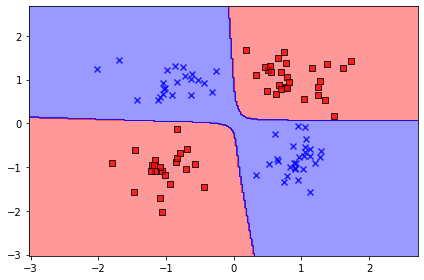

1.0
0.9876923076923076


In [ ]:
torch.manual_seed(RANDOM_SEED)

model_10000 = MLPReLU(num_features=2,
                num_hidden_1=10000,
                num_classes=2)

model_10000 = model_10000.to(DEVICE)

optimizer = torch.optim.SGD(model_10000.parameters(), lr=0.1)

model_10000.train(X_train, Y_train)

features = torch.tensor(X_train, dtype=torch.float).to(DEVICE)
targets = torch.tensor(Y_train, dtype=torch.long).to(DEVICE)

plot_decision_regions(features, targets, classifier=model_10000)

plt.tight_layout()
#plt.savefig('xor2.pdf')
plt.show()

train_accuracies.append(model_10000.evaluate(X_train, Y_train))
print(model_10000.evaluate(X_train, Y_train))

test_accuracies.append(model_10000.evaluate(X_test, Y_test))
print(model_10000.evaluate(X_test, Y_test))

In [ ]:
train_accuracies

[0.58, 0.97, 1.0, 1.0, 1.0, 1.0]

In [ ]:
test_accuracies

[0.6569230769230769,
 0.9784615384615385,
 0.9876923076923076,
 0.9861538461538462,
 0.9876923076923076,
 0.9876923076923076]

## a answer -> plotting the graphs

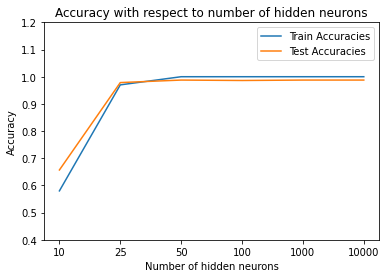

In [ ]:
bar_plot_x = [10, 25, 50 ,100, 1000, 10000]

X_axis = np.arange(len(bar_plot_x))


plt.plot(X_axis , train_accuracies, label="Train Accuracies")
plt.plot(X_axis , test_accuracies, label="Test Accuracies")

plt.xticks(X_axis, bar_plot_x,)
plt.xlabel("Number of hidden neurons")
plt.ylabel("Accuracy")
plt.ylim(0.4, 1.2)
plt.title("Accuracy with respect to number of hidden neurons")
plt.legend(loc='upper right')
plt.show()

## b answer -> Observing underfitting and overfitting

## We can see that the model is underfit (very less training and testing accuracies) at 10 neurons

## As the complexity increases(the number of neurons), the training and testing accuracies increases and are pretty close therby reducing underfitting.

## But when the complexity of the network increases, the training accuracy hits 100 and the accuracy of test plataeus, we can see overfitting from 50 neurons, though the overfitting isn't that much

## C Answer

## At smaller model complexity (10 hidden neurons), the model has high bias whereas as the model complexity increases, the bias deacreases, also as the model complexity increases the bias decreases.

## Eventhough the complexity of the model increases, the variance changes initially (increases) but it doesn't change after a point of time (after 50 neurons). The variance is less and the overfit is not that much